In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns 

## 1) Data Loading & Overview

In [3]:

# Load the Penguins dataset
df = sns.load_dataset('penguins')
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head(10)


Shape: (344, 7)
Columns: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       3625.0  Female  
7       4675.0    Male  
8       3475.0     NaN  
9       4250.0     NaN

## 2) Data Preprocessing — Missing Values

In [4]:

# Inspect missing values
na_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", na_counts)

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Impute numeric with mean; categorical with mode
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

# Verify no missing values remain
df.isna().sum()


Missing values per column:
 sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 3) Data Visualization — Species Distribution

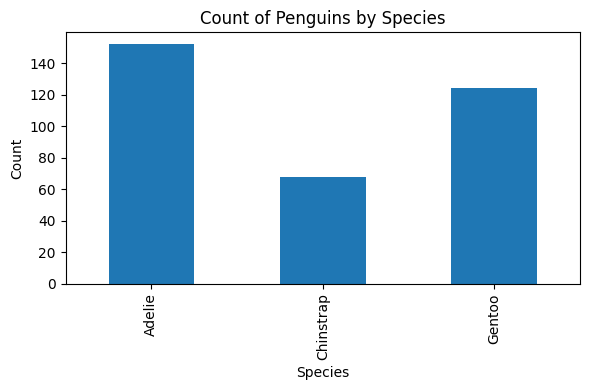

In [5]:

# Count of each species using matplotlib (no seaborn plotting)
species_counts = df['species'].value_counts().sort_index()
plt.figure(figsize=(6,4))
species_counts.plot(kind='bar')
plt.title("Count of Penguins by Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 4) Feature Encoding (island, sex)

In [6]:

# Encode categorical features island, sex; keep species as target (label encoded later)
encode_cols = ['island', 'sex']
label_encoders = {}

for col in encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Display mapping for transparency
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping for {col}:", mapping)

df.head()


Mapping for island: {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
Mapping for sex: {'Female': 0, 'Male': 1}


species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie       2        39.10000       18.70000         181.000000   
1  Adelie       2        39.50000       17.40000         186.000000   
2  Adelie       2        40.30000       18.00000         195.000000   
3  Adelie       2        43.92193       17.15117         200.915205   
4  Adelie       2        36.70000       19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000    1  
1  3800.000000    0  
2  3250.000000    0  
3  4201.754386    1  
4  3450.000000    0

## 5) Train–Test Split

In [7]:

# Features and target
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'island']
target_col = 'species'

# Label encode target
target_le = LabelEncoder()
df[target_col] = target_le.fit_transform(df[target_col].astype(str))

X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((275, 6), (69, 6))

## 6) Train Decision Tree (Entropy)

In [8]:

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_train_ent = dt_entropy.predict(X_train)
y_pred_test_ent = dt_entropy.predict(X_test)

acc_train_ent = accuracy_score(y_train, y_pred_train_ent)
acc_test_ent = accuracy_score(y_test, y_pred_test_ent)

print("Entropy Tree — Train Accuracy:", round(acc_train_ent, 4))
print("Entropy Tree — Test Accuracy:", round(acc_test_ent, 4))
print("Entropy Tree — Depth:", dt_entropy.get_depth())
print("Entropy Tree — Leaves:", dt_entropy.get_n_leaves())

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test_ent, target_names=target_le.classes_))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_ent))


Entropy Tree — Train Accuracy: 1.0
Entropy Tree — Test Accuracy: 0.9855
Entropy Tree — Depth: 7
Entropy Tree — Leaves: 15

Classification Report (Test):
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

Confusion Matrix (Test):
[[29  0  1]
 [ 0 14  0]
 [ 0  0 25]]


## 7) Visualize Decision Tree (Entropy)

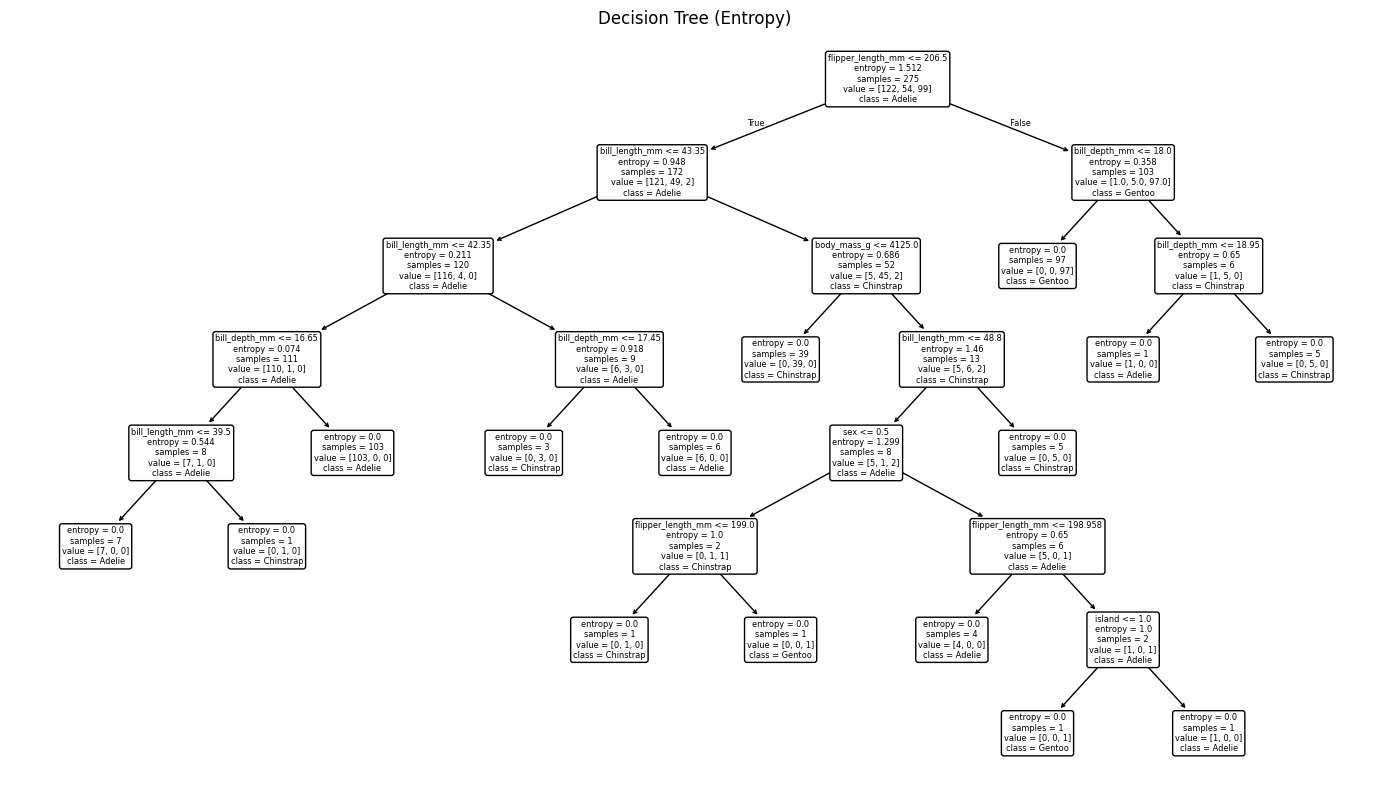

In [9]:

plt.figure(figsize=(14, 8))
plot_tree(
    dt_entropy,
    feature_names=feature_cols,
    class_names=target_le.classes_,
    filled=False,  # avoid specifying colors
    rounded=True
)
plt.title("Decision Tree (Entropy)")
plt.tight_layout()
plt.show()


## 8) Train Decision Tree (Gini)

In [10]:

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

y_pred_train_gini = dt_gini.predict(X_train)
y_pred_test_gini = dt_gini.predict(X_test)

acc_train_gini = accuracy_score(y_train, y_pred_train_gini)
acc_test_gini = accuracy_score(y_test, y_pred_test_gini)

print("Gini Tree — Train Accuracy:", round(acc_train_gini, 4))
print("Gini Tree — Test Accuracy:", round(acc_test_gini, 4))
print("Gini Tree — Depth:", dt_gini.get_depth())
print("Gini Tree — Leaves:", dt_gini.get_n_leaves())

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test_gini, target_names=target_le.classes_))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_gini))


Gini Tree — Train Accuracy: 1.0
Gini Tree — Test Accuracy: 1.0
Gini Tree — Depth: 6
Gini Tree — Leaves: 14

Classification Report (Test):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Confusion Matrix (Test):
[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]


## 9) Visualize Decision Tree (Gini)

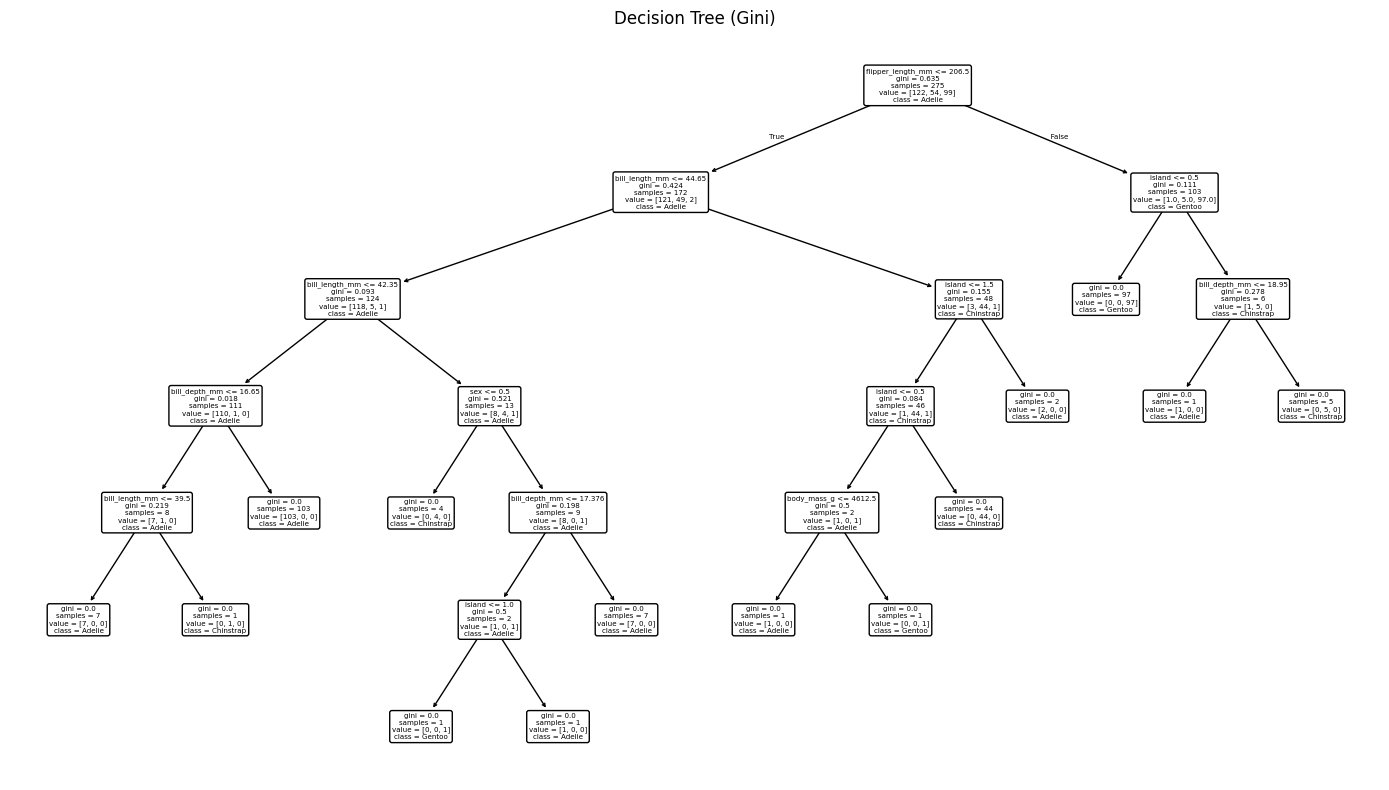

In [11]:

plt.figure(figsize=(14, 8))
plot_tree(
    dt_gini,
    feature_names=feature_cols,
    class_names=target_le.classes_,
    filled=False,  # avoid specifying colors
    rounded=True
)
plt.title("Decision Tree (Gini)")
plt.tight_layout()
plt.show()


## 10) Compare Entropy vs Gini

In [12]:

comparison = pd.DataFrame([
    {
        "Criterion": "Entropy",
        "Train Accuracy": acc_train_ent,
        "Test Accuracy": acc_test_ent,
        "Depth": dt_entropy.get_depth(),
        "Leaves": dt_entropy.get_n_leaves()
    },
    {
        "Criterion": "Gini",
        "Train Accuracy": acc_train_gini,
        "Test Accuracy": acc_test_gini,
        "Depth": dt_gini.get_depth(),
        "Leaves": dt_gini.get_n_leaves()
    }
])

comparison.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)


Criterion  Train Accuracy  Test Accuracy  Depth  Leaves
0      Gini             1.0       1.000000      6      14
1   Entropy             1.0       0.985507      7      15

## (Additional) Limit tree depth to prevent overfitting

In [2]:

# Example: limit tree depth to reduce overfitting
dt_gini_reg = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_gini_reg.fit(X_train, y_train)
print("Gini (max_depth=3) — Test Accuracy:", round(accuracy_score(y_test, dt_gini_reg.predict(X_test)), 4))

dt_entropy_reg = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt_entropy_reg.fit(X_train, y_train)
print("Entropy (max_depth=3) — Test Accuracy:", round(accuracy_score(y_test, dt_entropy_reg.predict(X_test)), 4))


NameError: name 'DecisionTreeClassifier' is not defined